In [275]:
import sklearn as sk
import pandas as pd
import numpy as np
from os import getenv
from datetime import datetime
from amb_sdk.sdk import DarwinSdk
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', None)

In [97]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

status, msg = ds.auth_login_user('danny.diaz@utexas.edu','JcXCnQ7Wx2')
if not status:
    print(msg)
status

True

In [385]:
cycle_trips_df = pd.read_csv('./data/Austin_B-Cycle_Trips.csv')
weather_df = pd.read_csv('./data/austin_weather.csv')

In [386]:
cycle_trips_df['Checkout Date'] = pd.to_datetime(
    cycle_trips_df['Checkout Date'], infer_datetime_format=True
    ).dt.normalize() #strftime('%m/%d/%Y') # format='%m/%d/%Y').dt.date

cycle_trips_df['Checkout Time'] = pd.to_datetime(
    cycle_trips_df['Checkout Time'], format='%H:%M:%S'
).dt.strftime('%H:%M')

cycle_trips_df.dtypes
cycle_trips.shape

(1077929, 12)

In [387]:
weather_df['Date'] = pd.to_datetime(
    weather_df['Date'], infer_datetime_format=True
    ).dt.normalize() #strftime('%m/%d/%Y') # format='%m/%d/%Y').dt.date

print(weather_df.dtypes)

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object


In [333]:
print('Cycle Trips Earliest Data',cycle_trips_df['Checkout Date'].dt.date.min())
print('Cycle Trips Latest Data',cycle_trips_df['Checkout Date'].dt.date.max())

print('Weather Earliest Data',weather_df['Date'].dt.date.min())
print('Weather Latest Data',weather_df['Date'].dt.date.max())

Cycle Trips Earliest Data 2013-12-21
Cycle Trips Latest Data 2017-07-31
Weather Earliest Data 2013-12-21
Weather Latest Data 2017-07-31


In [392]:
cycle_trips_df = cycle_trips_df[
    cycle_trips_df['Checkout Date'].between('2013-12-21', 
                                            '2017-07-31', 
                                            inclusive=True)
]

cycle_trips_df.drop(cycle_trips_df[
    cycle_trips_df['Trip Duration Minutes'].isin([0,1,2])].index, 
                    inplace=True)

cycle_trips_df.shape
#cycle_trips_df[cycle_trips_df['Trip ID'] == 16553021]

(620432, 12)

In [328]:
weather_df = weather_df[
  weather_df['Date'].between('2013-12-21','2017-07-31',inclusive=True)  
]

In [189]:
print(cycle_trips_df.shape)
cycle_trips_df.head()

(649231, 12)


,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26,13:12,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,2014-10-26,13:12,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0
2,9900285856,Annual Membership (Austin B-cycle),214.0,2014-10-26,13:12,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,2014-10-26,13:12,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,2014-10-26,13:12,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0


In [329]:
print(weather_df.shape)
weather_df.head(5)

(1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


The dates we are going to use are 1/1/14 to 7/31/17


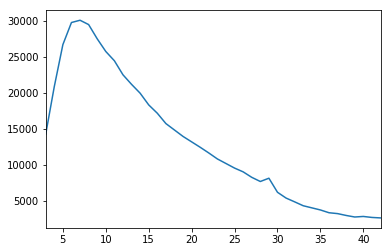

In [422]:
cycle_trips_df['Trip Duration Minutes'].value_counts().sort_index().head(40).plot()
#.sort_values(ascending=False)
#.head(50).plot()

Seems like the trip duration is an exponential decay.

In [425]:
cycle_trips_df['Checkout WeekDay'] = \
        cycle_trips_df['Checkout Date'].dt.day_name()

weather_df['Weekday'] = weather_df['Date'].dt.day_name()

cycle_trips_df['Checkout WeekDay'].head()

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: Checkout WeekDay, dtype: object

In [426]:
cycle_weekdays = cycle_trips_df.groupby('Checkout WeekDay')
cycle_months   = cycle_trips_df.groupby('Month')
cycle_checkout = cycle_trips_df.groupby('Checkout Kiosk')
cycle_return  = cycle_trips_df.groupby('Return Kiosk')

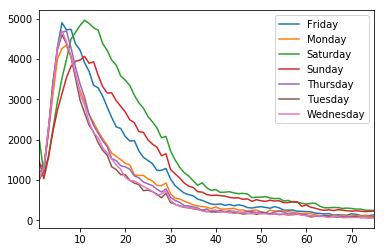

In [335]:
for name,group in cycle_weekdays:
    group['Trip Duration Minutes'].value_counts().sort_index()\
    .head(75).plot(legend=True,label=name)

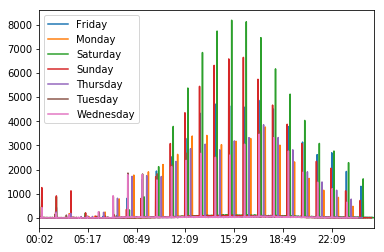

In [336]:
for name,group in cycle_weekdays:
    group['Checkout Time'].value_counts().sort_index()\
    .plot(legend=True,label=name)

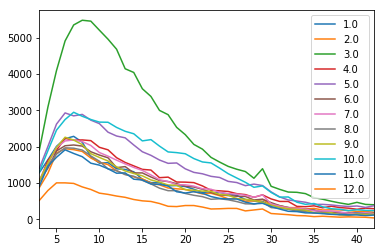

In [428]:
for name,group in cycle_months:
    group['Trip Duration Minutes'].value_counts().sort_index()\
    .head(40).plot(legend=True,label=name)

In [441]:
for name,group in cycle_checkout:
    print('Checkout',name)
    print(group['Return Kiosk'].value_counts().head(15))#\
#     .head(10).plot(legend=True,label=name)

Checkout 11th & San Jacinto
East 11th St. & San Marcos                 210
Davis at Rainey Street                     204
11th & San Jacinto                         184
Brazos & 6th                               165
Convention Center / 4th St. @ MetroRail    132
4th & Congress                             121
Capitol Station / Congress & 11th          114
Red River & 8th Street                     112
UT West Mall @ Guadalupe                    96
Convention Center / 3rd & Trinity           84
8th & Congress                              82
City Hall / Lavaca & 2nd                    76
2nd & Congress                              67
East 11th St. at Victory Grill              61
Trinity & 6th Street                        59
Name: Return Kiosk, dtype: int64
Checkout 13th & San Antonio
13th & San Antonio                   97
West & 6th St.                       35
City Hall / Lavaca & 2nd             33
Convention Center / 3rd & Trinity    21
8th & Congress                       19
Capito

Toomey Rd @ South Lamar                                 474
5th & Bowie                                             344
City Hall / Lavaca & 2nd                                199
Zilker Park at Barton Springs & William Barton Drive    164
Pfluger Bridge @ W 2nd Street                           158
Riverside @ S. Lamar                                    145
2nd & Congress                                          145
4th & Congress                                          137
Barton Springs Pool                                     113
Rainey St @ Cummings                                    112
Barton Springs @ Kinney Ave                             107
West & 6th St.                                          106
Convention Center / 4th St. @ MetroRail                  86
Long Center @ South 1st & Riverside                      86
Republic Square @ Guadalupe & 4th St.                    82
Name: Return Kiosk, dtype: int64
Checkout Trinity & 6th Street
Trinity & 6th Street                 

In [395]:
checkout_return_pairs = cycle_trips_df.\
    groupby(['Checkout Kiosk','Return Kiosk']).size().reset_index()\
    .rename(columns={0:'counts'}) #.value_counts().head(15).plot(kind='bar')

checkout_return_pairs = checkout_return_pairs\
    .sort_values('counts', ascending=False).reset_index()

total_trips = checkout_return_pairs['counts'].sum()

checkout_return_pairs['freq_%'] = checkout_return_pairs['counts']\
    .map(lambda x: round(x/total_trips*100,4))

# checkout_return_pairs = checkout_return_pairs.\
#     set_index('freq_%').sort_index(ascending=False)

print(total_trips)
print(checkout_return_pairs.shape)

checkout_return_pairs.head(100)



# checkout_return_pairs['freq']

620432
(5098, 5)


,index,Checkout Kiosk,Return Kiosk,counts,freq_%
0,3949,Riverside @ S. Lamar,Riverside @ S. Lamar,7799,1.2570
1,3574,Rainey St @ Cummings,Rainey St @ Cummings,4997,0.8054
2,196,2nd & Congress,2nd & Congress,3681,0.5933
3,1572,City Hall / Lavaca & 2nd,City Hall / Lavaca & 2nd,3422,0.5516
4,4987,Zilker Park,Zilker Park,3226,0.5200
5,5097,Zilker Park at Barton Springs & William Barton...,Zilker Park at Barton Springs & William Barton...,3125,0.5037
6,3355,Pfluger Bridge @ W 2nd Street,Pfluger Bridge @ W 2nd Street,3077,0.4959
7,1489,Capitol Station / Congress & 11th,Capitol Station / Congress & 11th,2929,0.4721
8,3225,Palmer Auditorium,Palmer Auditorium,2571,0.4144
9,993,Barton Springs & Riverside,Barton Springs & Riverside,2527,0.4073


In [402]:
groups = cycle_trips_df.\
    groupby(['Checkout Kiosk','Return Kiosk'])


columns = ['Checkout Kiosk','Return Kiosk', 'Avg Trip Duration', 
          'Mode Trip Duration']
checkout_return_pairs_avg = pd.DataFrame(columns=columns)
for (checkout, checkin),group in groups:
    checkout_return_pairs_avg = checkout_return_pairs_avg\
        .append({col_name: value for col_name, value in 
                 zip(columns,[checkout,checkin,
                group['Trip Duration Minutes'].mean(),
                group['Trip Duration Minutes'].mode().max()])
                }, ignore_index=True)

checkout_return_pairs_avg.shape

# .size().reset_index()\
#     .rename(columns={0:'counts'})

(5098, 4)

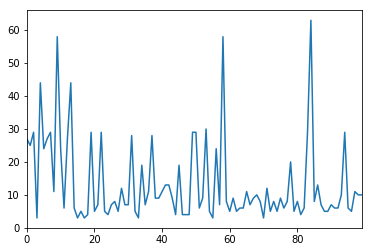

In [421]:
checkout_return_pair_data = pd.merge(checkout_return_pairs, 
                                     checkout_return_pairs_avg,
                                     how='inner',
                                    left_on=['Checkout Kiosk',
                                             'Return Kiosk'],
                                    right_on=['Checkout Kiosk',
                                             'Return Kiosk'],
                                    )
checkout_return_pair_data['Mode Trip Duration'].head(100).plot()


Most of the long trip durations are returned to the station they were checked out of.

All of the short trips are returned at a different station.

In [442]:
checkout_return_pair_data[checkout_return_pair_data[
    'Avg Trip Duration'
] < 15].head(15)


,index,Checkout Kiosk,Return Kiosk,counts,freq_%,Avg Trip Duration,Mode Trip Duration
11,439,5th & Bowie,4th & Congress,2429,0.3915,8.991354,6
14,357,4th & Congress,5th & Bowie,2251,0.3628,11.327410,6
16,457,5th & Bowie,City Hall / Lavaca & 2nd,2124,0.3423,11.005179,5
18,296,3rd & West,City Hall / Lavaca & 2nd,1855,0.2990,8.933693,4
20,1764,Convention Center / 4th St. @ MetroRail,City Hall / Lavaca & 2nd,1790,0.2885,13.854749,5
23,1555,City Hall / Lavaca & 2nd,5th & Bowie,1666,0.2685,11.029412,5
24,3823,Republic Square @ Guadalupe & 4th St.,5th & Bowie,1653,0.2664,7.770115,4
26,460,5th & Bowie,Convention Center / 4th St. @ MetroRail,1509,0.2432,13.652750,8
27,278,3rd & West,4th & Congress,1499,0.2416,9.168779,5
35,437,5th & Bowie,2nd & Congress,1318,0.2124,12.780728,7


In [443]:
checkout_return_pair_data[checkout_return_pair_data[
    'Avg Trip Duration'
] > 25].head(15)

,index,Checkout Kiosk,Return Kiosk,counts,freq_%,Avg Trip Duration,Mode Trip Duration
0,3949,Riverside @ S. Lamar,Riverside @ S. Lamar,7799,1.2570,52.916015,27
1,3574,Rainey St @ Cummings,Rainey St @ Cummings,4997,0.8054,63.470082,25
2,196,2nd & Congress,2nd & Congress,3681,0.5933,75.861451,29
3,1572,City Hall / Lavaca & 2nd,City Hall / Lavaca & 2nd,3422,0.5516,74.004383,3
4,4987,Zilker Park,Zilker Park,3226,0.5200,59.846559,44
5,5097,Zilker Park at Barton Springs & William Barton...,Zilker Park at Barton Springs & William Barton...,3125,0.5037,53.919360,24
6,3355,Pfluger Bridge @ W 2nd Street,Pfluger Bridge @ W 2nd Street,3077,0.4959,57.786155,27
7,1489,Capitol Station / Congress & 11th,Capitol Station / Congress & 11th,2929,0.4721,54.652783,29
8,3225,Palmer Auditorium,Palmer Auditorium,2571,0.4144,64.497083,11
9,993,Barton Springs & Riverside,Barton Springs & Riverside,2527,0.4073,77.552434,58
